## Research Project - Body Dimensions (bdims.csv)

## Reference

Heinz, G., Peterson, L. J., Johnson, R. W., &amp; Kerk, C. J. (2017). Exploring relationships in body dimensions. Journal of Statistics Education, 11(2). https://doi.org/10.1080/10691898.2003.11910711 

### Imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

## 1. Introduction
## Title - Body Dimension Data Analysis


### Motivation

Some people are tall, some are short, some are fat, and some are thin. There are a lot of differences between our bodies and investigating these differences sometimes is very interesting. 
I am thinking if there would be some kind of associations between the figures of girths and diameters of different body parts of males and females. I choose this data set that has data on different body parts, which can help us investigate the correspondence between body build and girths in men and women of different ages.


### Dataset Brief

This dataset consists of data from 247 males and 260 females, all taken in California. All the participants are physically active and do exercise several hours per week, in which most of them are in their twenties and early thirties, with a small group of older men and women. Thus, concluding from the statement above, the population of our dataset is physically active people in California. 

However, the author also stated that "the dataset does not constitute a random sample from a well-defined population" (Heinz et al., 2017), which means the dataset is not random.

See the “Variables” part for the detail of the data.


### Variables

**Please note**: We modified the variable names of the original dataset, by changing all the dots (".") to underscores ("_"). For example, **bia.di** is replaced by **bia_di**. We made the change because some Python functions do not recognize the variable name with a dot in it.

- **bia_di**: A numerical vector, respondent's biacromial diameter in centimeters.
- **bii_di**: A numerical vector, respondent's biiliac diameter (pelvic breadth) in centimeters.
- **bit_di**: A numerical vector, respondent's bitrochanteric diameter in centimeters.
- **che_de**: A numerical vector, respondent's chest depth in centimeters, measured between spine and sternum at nipple level, mid-expiration.
- **che_di**: A numerical vector, respondent's chest diameter in centimeters, measured at nipple level, mid-expiration.
- **elb_di**: A numerical vector, respondent's elbow diameter in centimeters, measured as sum of two elbows.
- **wri_di**: A numerical vector, respondent's wrist diameter in centimeters, measured as sum of two wrists.
- **kne_di**: A numerical vector, respondent's knee diameter in centimeters, measured as sum of two knees.
- **ank_di**: A numerical vector, respondent's ankle diameter in centimeters, measured as sum of two ankles.
- **sho_gi**: A numerical vector, respondent's shoulder girth in centimeters, measured over deltoid muscles.
- **che_gi**: A numerical vector, respondent's chest girth in centimeters, measured at nipple line in males and just above breast tissue in females, mid-expiration.
- **wai_gi**: A numerical vector, respondent's waist girth in centimeters, measured at the narrowest part of torso below the rib cage as average of contracted and relaxed position.
- **nav_gi**: A numerical vector, respondent's navel (abdominal) girth in centimeters, measured at umbilicus and iliac crest using iliac crest as a landmark.
- **hip_gi**: A numerical vector, respondent's hip girth in centimeters, measured at at level of bitrochanteric diameter.
- **thi_gi**: A numerical vector, respondent's thigh girth in centimeters, measured below gluteal fold as the average of right and left girths.
- **bic_gi**: A numerical vector, respondent's bicep girth in centimeters, measured when flexed as the average of right and left girths.
- **for_gi**: A numerical vector, respondent's forearm girth in centimeters, measured when extended, palm up as the average of right and left girths.
- **kne_gi**: A numerical vector, respondent's knee diameter in centimeters, measured as sum of two knees.
- **cal_gi**: A numerical vector, respondent's calf maximum girth in centimeters, measured as average of right and left girths.
- **ank_gi**: A numerical vector, respondent's ankle minimum girth in centimeters, measured as average of right and left girths.
- **wri_gi**: A numerical vector, respondent's wrist minimum girth in centimeters, measured as average of right and left girths.
- **age**: A numerical vector, respondent's age in years.
- **wgt**: A numerical vector, respondent's weight in kilograms.
- **hgt**: A numerical vector, respondent's height in centimeters.
- **sex**: A categorical vector, 1 if the respondent is male, 0 if female.


### Topics Touched

**Data Preprocessin:** Cleaning, Standardization, Multicollinearity

**Algorithms:** Linear Model, Random Forest (depth), Ensemble Forest, KNN, Pipeline, Neural Network

**Measuring metrics:** R2, Cohen Kappa Score, Gini Impurity (for tree)

**Cross-Validation:** K-fold


### Research Questions

**Linear Regression Research Question** - Is there a relationship between Wrist Diameter and Gender, Age, Thigh Girth, and Chest Diameter in the sample? Can we predict Wrist Diameter well with our model?

**Logistic Regression Research Question** - Is there a relationship between Gender and Wrist Diameter, Age, Thigh Girth, and Chest Diameter in the sample? Can we predict Gender well with our model?

### Dataset Exploration

In [2]:
body_dimensions = pd.read_csv('bdims.csv')
body_dimensions.isna().sum()
# There is no unique or missing values in this dataframe

bia_di    0
bii_di    0
bit_di    0
che_de    0
che_di    0
elb_di    0
wri_di    0
kne_di    0
ank_di    0
sho_gi    0
che_gi    0
wai_gi    0
nav_gi    0
hip_gi    0
thi_gi    0
bic_gi    0
for_gi    0
kne_gi    0
cal_gi    0
ank_gi    0
wri_gi    0
age       0
wgt       0
hgt       0
sex       0
dtype: int64

In [3]:
body_dimensions.sample(10)
# 10 random samples for this dataframe

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
147,38.7,26.8,31.5,18.0,27.8,12.9,10.4,18.0,14.3,109.4,...,31.0,25.7,35.0,33.0,22.0,15.5,28,71.4,180.3,1
473,38.0,33.3,37.8,20.6,28.3,15.0,11.5,22.6,13.8,127.1,...,35.9,30.6,49.0,45.4,24.1,17.8,43,104.1,165.1,0
162,43.0,30.8,34.7,22.1,32.2,16.0,13.2,19.5,16.1,122.4,...,36.4,29.2,40.9,42.1,26.1,19.5,55,87.3,179.1,1
311,39.6,30.4,34.2,21.4,26.8,14.2,10.6,20.7,13.1,110.8,...,34.3,26.5,38.3,41.1,22.9,16.4,41,80.0,161.0,0
177,41.3,30.8,33.3,22.5,28.3,13.0,10.5,19.7,13.4,117.3,...,35.3,26.9,36.6,32.3,22.0,17.1,34,81.8,177.8,1
478,37.8,29.0,32.4,20.6,28.5,12.7,9.1,18.2,13.2,110.3,...,29.9,24.9,38.7,36.3,21.3,15.5,28,72.3,167.6,0
460,37.6,26.8,31.1,16.5,24.0,11.8,10.2,18.4,12.8,98.6,...,24.2,21.2,33.0,34.3,20.2,15.0,24,54.5,170.2,0
91,42.0,27.6,32.2,19.7,29.4,13.9,10.0,18.7,13.8,113.0,...,33.3,28.0,36.0,37.8,20.3,16.5,44,73.4,174.0,1
76,40.5,27.5,32.3,19.4,28.8,12.6,10.6,18.4,14.0,114.3,...,32.3,26.8,35.8,37.6,21.1,15.8,26,72.0,177.5,1
303,33.8,29.7,32.4,17.3,25.4,13.4,9.6,18.4,13.4,94.5,...,26.0,22.6,35.9,32.5,19.7,14.6,21,60.7,180.3,0


In [4]:
body_dimensions.shape

(507, 25)

**There are 507 rows and 25 columns in the original dataframe.**

We split the data frame into the female version and male version respectively

In [5]:
body_dimensions_female = body_dimensions[body_dimensions['sex'] == 0]
body_dimensions_female.sample(10)
# Dataframe for females

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
488,36.5,28.3,29.7,17.7,26.4,12.0,10.0,17.1,12.8,98.3,...,27.6,23.3,35.2,31.9,19.6,15.4,32,61.4,162.6,0
261,35.0,26.5,31.6,18.3,23.7,11.5,8.6,16.8,12.2,96.6,...,25.6,21.6,34.4,32.8,19.1,13.8,22,50.0,160.0,0
283,39.7,31.6,34.5,19.0,24.9,12.7,10.4,18.2,13.1,112.2,...,31.0,25.4,37.2,35.2,22.3,16.1,31,73.2,170.0,0
444,33.3,25.9,29.9,18.0,25.6,12.0,9.2,17.6,12.9,99.4,...,26.9,22.3,32.8,29.5,18.7,13.7,34,53.2,159.4,0
449,37.6,27.8,31.1,19.9,25.9,12.9,9.6,17.2,13.8,101.4,...,28.9,23.8,33.9,33.9,20.8,15.5,19,54.5,162.6,0
428,37.8,29.4,32.2,15.8,27.5,11.8,9.8,18.2,13.8,95.9,...,25.1,23.1,34.6,32.7,21.4,14.6,25,55.0,168.9,0
501,36.5,29.7,34.0,20.2,28.5,13.3,9.8,18.9,12.4,104.0,...,32.3,26.4,35.7,37.0,21.4,15.8,40,76.8,157.5,0
439,34.9,27.3,32.2,17.7,25.4,12.6,9.0,17.4,12.2,87.0,...,23.1,21.0,35.5,36.4,20.3,13.0,37,53.9,162.6,0
331,34.4,26.1,30.5,18.8,25.2,12.0,9.9,17.5,12.7,93.9,...,24.3,22.3,34.2,34.8,20.2,14.4,30,52.8,169.5,0
291,36.2,27.1,29.9,16.0,24.2,11.8,9.2,17.3,12.6,95.5,...,27.0,24.3,34.9,35.7,22.0,15.1,20,60.3,161.3,0


In [6]:
body_dimensions_female.shape

(260, 25)

**There are 260 rows and 25 columns in the female dataframe.**

In [7]:
body_dimensions_male = body_dimensions[body_dimensions['sex'] == 1]
body_dimensions_male.sample(10)
# Dataframe for males

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
212,42.5,29.4,34.4,19.9,34.0,14.5,11.0,21.3,14.4,124.5,...,34.8,30.1,45.7,43.6,26.9,17.0,30,91.1,175.3,1
22,42.3,26.4,31.2,18.0,30.9,14.6,10.8,18.6,13.8,117.7,...,31.2,26.9,36.2,33.3,23.5,16.0,22,66.2,172.7,1
206,40.3,28.3,30.6,18.2,29.2,12.9,10.6,20.2,14.2,112.0,...,30.3,25.0,36.0,35.0,22.4,16.7,62,66.8,167.6,1
143,41.1,27.1,33.8,24.9,29.4,14.4,12.4,18.0,15.1,120.4,...,38.2,29.9,37.7,39.2,24.9,17.6,44,87.7,177.8,1
94,46.2,31.0,36.0,25.0,33.1,14.6,12.0,20.9,15.1,125.0,...,37.5,29.0,41.2,39.3,24.6,18.6,37,102.3,192.0,1
191,41.2,29.8,32.2,22.4,29.8,15.6,11.2,19.6,14.8,120.0,...,36.6,29.9,34.2,34.8,22.0,18.1,23,86.4,175.3,1
77,34.1,28.1,30.1,21.8,25.8,12.9,9.9,18.6,12.3,105.4,...,28.6,24.8,34.9,35.1,20.1,15.4,23,56.8,170.5,1
176,42.5,31.3,33.1,19.4,32.0,14.8,11.3,20.1,15.5,117.5,...,33.3,27.7,37.1,37.4,22.6,17.1,37,85.9,188.0,1
117,43.0,30.6,33.8,23.3,35.3,15.6,12.0,21.6,16.4,124.9,...,38.2,30.1,41.2,39.4,25.1,17.7,28,93.2,180.3,1
87,44.3,28.2,32.2,21.2,31.8,14.2,11.6,20.0,14.4,123.0,...,36.9,29.4,38.4,38.6,23.1,17.3,33,83.4,177.1,1


In [8]:
body_dimensions_male.shape

(247, 25)

**There are 247 rows and 25 columns in the male dataframe.**

______
<br/><br/>

## 2. Regression Question Set

### Is there a relationship between Wrist Diameter and Gender, Age, Thigh Girth, and Chest Diameter in the sample? Can we predict Wrist Diameter well with our model?

### 1. Linear Model

In [9]:
#### - Linear Model Way 1 - statsmodels

import statsmodels.api as sm
import statsmodels.formula.api as smf

model1 = smf.ols("wri_di ~ sex + age + thi_gi + che_di", data = body_dimensions).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wri_di   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     223.2
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          6.49e-110
Time:                        17:58:50   Log-Likelihood:                -430.82
No. Observations:                 507   AIC:                             871.6
Df Residuals:                     502   BIC:                             892.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1443      0.386     13.341      0.000       4.387       5.902
sex            0.9382      0.079     11.831      0.000       0.782       1.094
age            0.0071      0.003      2.619      0.009       0.002       0.012
thi_gi         0.0279      0.007      4.168      0.000       0.015       0.041
che_di         0.1124      0.015      7.311      0.000       0.082       0.143
==============================================================================
Omnibus:                        2.460   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                2.404
Skew:                           0.169   Prob(JB):                        0.301
Kurtosis:                       2.996   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

sklearn vs ols ?
drives: useful for clothihng? model purpose?s scenario

In [10]:
#### - Linear Model Way 2 - sklearn
from sklearn import linear_model, model_selection

features = ['sex', 'age', 'thi_gi', 'che_di']
X = body_dimensions[features]
y = body_dimensions['wri_di']
xval = model_selection.KFold(10, shuffle=True)

model1_ = linear_model.LinearRegression()

results = model_selection.cross_validate(model1_, X, y, cv=xval, 
                                         return_train_score=True, scoring='r2')   #cohen kappa for classification, R^2 for regression

print('Mean R2:', results['test_score'].mean())
print('R2 SD:', results['test_score'].std())
print('R2 Mean (train):', results['train_score'].mean())    #quite a okay figure, not overfitted

Mean R2: 0.6092049449799821
R2 SD: 0.09646101597094232
R2 Mean (train): 0.6404006585813633


feature selection

recersive feature elimination

correlation table

lets get their coefficients and intercepts

In [11]:
reg = model1_.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[0.93815302 0.00705159 0.0278809  0.11236243]
5.144335645508971


#### Linear Regression Equation:

Wrist Diameter = 5.1443 + 0.9382*Gender + 0.0071*Age + 0.0279*Thigh Girth + 0.1124*Chest Diameter

#### Linear Conditions:

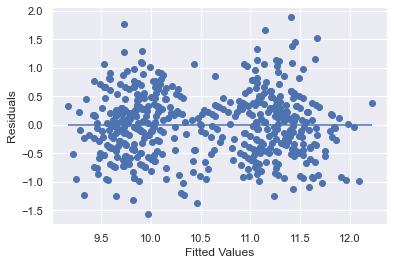

In [12]:
plt.scatter(model1.fittedvalues, model1.resid)
plt.hlines(y=0, xmin = np.min(model1.fittedvalues), xmax = np.max(model1.fittedvalues))
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.show()

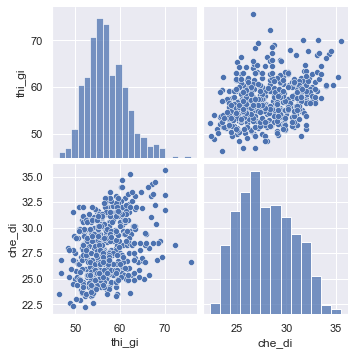

In [13]:
sns.pairplot(body_dimensions[["thi_gi","che_di"]])
plt.show()

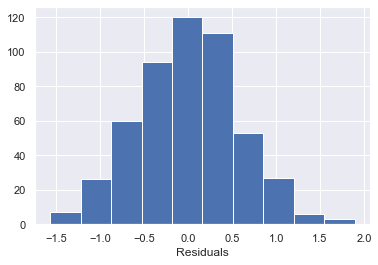

In [14]:
plt.hist(model1.resid)
plt.xlabel('Residuals') 
plt.show()

1. Linearity Condition, met: because the distribution of points in the plot above are roughly evenly distributed above and below the line as we move from left to right, we can say the linearity condition is met;


2. Constant Variability of Residuals Condition, met: because the y‑axis spread of points in the plot below do not change as moving from left to right, we can say that this condition is met;


3. Normality of Residuals Condition, met: because the histogram of residuals normal and, the assumption that the residuals are normally distributed is met;


4. Independence of Residuals Condition, not met: the dataframe is not random;


5. Multicollinearity Condition, met: there is no obvious linear relationship between the explanatory variables Chest Diameter and Thigh Girth. 

###  2. Random Forest and Ensemble Forest

In [15]:
# 1. Random Forest
from sklearn import tree

r_mean = []
r_std = []

for min_leaf in range(1, 500):
    model2 = tree.DecisionTreeRegressor(min_samples_leaf=min_leaf)

    xval = model_selection.KFold(10, shuffle=True)
    result = model_selection.cross_validate(model2, X, y, cv=xval, scoring='r2', return_train_score=True)

    r_mean.append(result['test_score'].mean())
    r_std.append(result['test_score'].std())

In [16]:
print('max r2 with a certain sample number:', max(r_mean))
print('this min sample number:',     r_mean.index(max(r_mean)) - 1)

sample = r_mean.index(max(r_mean)) - 1

max r2 with a certain sample number: 0.6046044572917133
this min sample number: 40


In [17]:
print("this number's test r2 std:", r_std[r_mean.index(max(r_mean))])

this number's test r2 std: 0.058615820968239064


Text(0, 0.5, 'average R2 score each leaf (test)')

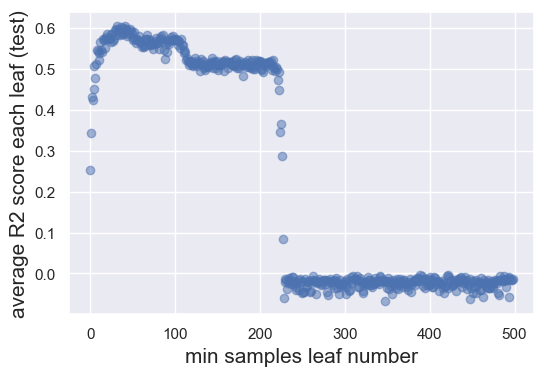

In [18]:
r_mean = pd.DataFrame(r_mean)

plt.figure(dpi=100)
plt.scatter(r_mean.index, r_mean.values, alpha=0.5)
plt.xlabel('min samples leaf number', fontsize=15)
plt.ylabel('average R2 score each leaf (test)', fontsize=15)

lets zoom in a bit on the first 100 samples-per-leaf choices

Text(0, 0.5, 'average R2 score each leaf (test)')

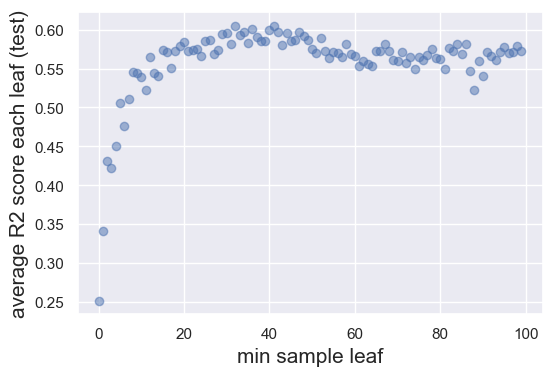

In [19]:
plt.figure(dpi=100)
plt.scatter(r_mean[:100].index, r_mean[:100].values, alpha=0.5)
plt.xlabel('min sample leaf', fontsize=15)
plt.ylabel('average R2 score each leaf (test)', fontsize=15)

lets dive into this choice's figures

In [20]:
model2 = tree.DecisionTreeRegressor(min_samples_leaf=sample)

xval = model_selection.KFold(10, shuffle=True)
result = model_selection.cross_validate(model2, X, y, cv=xval, scoring='r2', return_train_score=True)

print('R2 Mean:', result['test_score'].mean())
print('R2 STD:', result['test_score'].std())
print('R2 Mean (train):', result['train_score'].mean())    #quite a okay figure, not overfitted

R2 Mean: 0.5932147916263063
R2 STD: 0.06815156631637308
R2 Mean (train): 0.6466736775956652


plot its tree

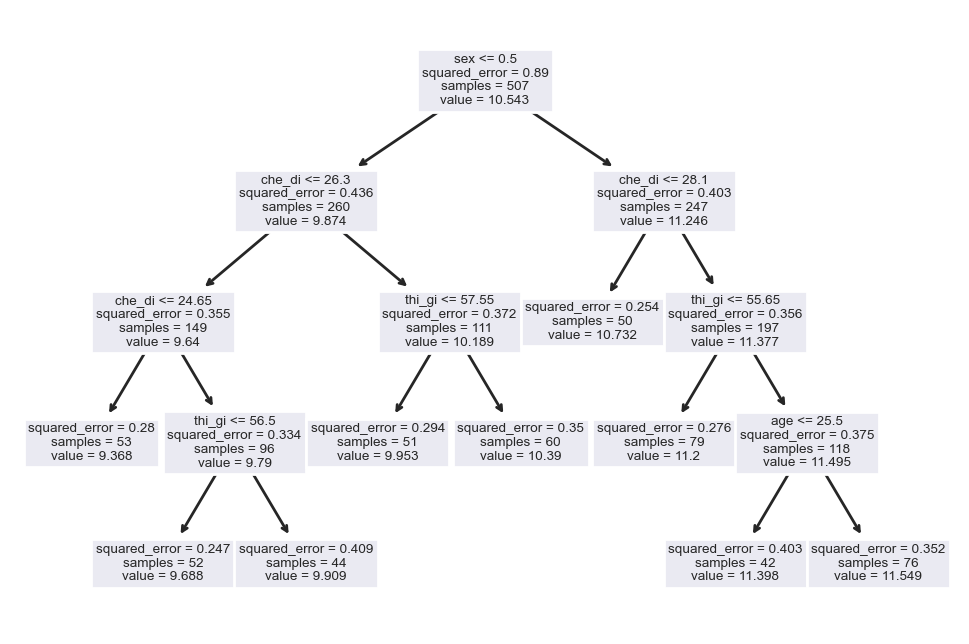

In [21]:
model2.fit(X,y)

plt.figure(dpi=200)
_ = tree.plot_tree(model2, feature_names=features)

In [22]:
# 2. ensembled random forest
from sklearn import ensemble

features = ['sex', 'age', 'thi_gi', 'che_di']
X = body_dimensions[features]
y = body_dimensions['wri_di']

r2_mean = []
r2_std = []

for n in range(1, 200):
    model2 = ensemble.RandomForestRegressor(n,                          #n decisoin trees to cancel each other out, 
                                            min_samples_leaf=sample,    #also control each individual tree to not ovefit
                                            max_samples=0.5)            #control each tree's sampling portion of the train data

    xval = model_selection.KFold(10, shuffle=True)

    result = model_selection.cross_validate(model2, X, y, cv=xval, scoring='r2', return_train_score=True)

    r2_mean.append(result['test_score'].mean())
    r2_std.append(result['test_score'].std())

In [23]:
print('max r2 with a certain tree count number:', max(r2_mean))
print('this number:', r2_mean.index(max(r2_mean))-1)

n = r2_mean.index(max(r2_mean))-1

max r2 with a certain tree count number: 0.6084444270267453
this number: 37


In [24]:
print("this number's test r2 std:", r2_std[r2_mean.index(max(r2_mean))])

this number's test r2 std: 0.04514018464034033


lets see the visualizatoin

Text(0, 0.5, 'average R2 score each n (test)')

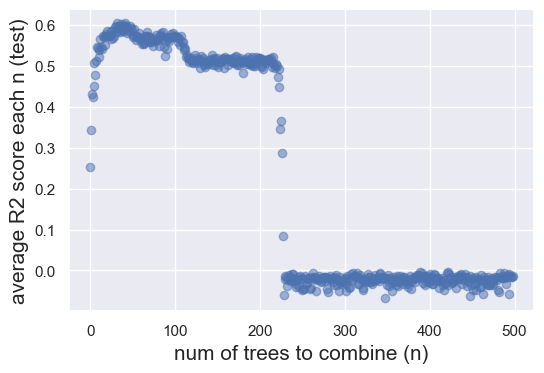

In [25]:
r_mean = pd.DataFrame(r_mean)

plt.figure(dpi=100)
plt.scatter(r_mean.index, r_mean.values, alpha=0.5)
plt.xlabel('num of trees to combine (n)', fontsize=15)
plt.ylabel('average R2 score each n (test)', fontsize=15)

Text(0, 0.5, 'average R2 score each n (test)')

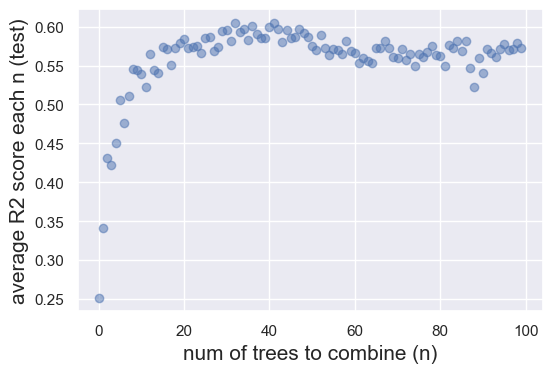

In [26]:
plt.figure(dpi=100)
plt.scatter(r_mean[:100].index, r_mean[:100].values, alpha=0.5)
plt.xlabel('num of trees to combine (n)', fontsize=15)
plt.ylabel('average R2 score each n (test)', fontsize=15)

In [27]:
from sklearn import ensemble, metrics, preprocessing #its combined random forests to cancell each other's overfitting

X = body_dimensions[features]
y = body_dimensions['wri_di']

xval = model_selection.KFold(10, shuffle=True)
model2_ = ensemble.RandomForestRegressor(n,                          #n decisoin trees to cancel each other out, 
                                         min_samples_leaf=sample,    #also control each individual tree to not ovefit
                                         max_samples=0.5)            #control each tree's sampling portion of the train data

result = model_selection.cross_validate(model2_, X, y, cv=xval, scoring='r2', return_train_score=True)

print('R2 Mean:', result['test_score'].mean())
print('R2 STD:', result['test_score'].std())
print('R2 Mean (train):', result['train_score'].mean())        #a okay figure, model not really overfitted to the train dataset

R2 Mean: 0.5814064125745964
R2 STD: 0.08092838110826102
R2 Mean (train): 0.6221810915310559


however, random forest and ensemble do not seem to make that much of a difference in terms of model's R2 (0.591vs 0.598)

###  3. KNN

In [28]:
from sklearn import neighbors

X = body_dimensions[features]
y = body_dimensions['wri_di']

scaler = preprocessing.StandardScaler()                #standardize the input x
X = scaler.fit_transform(X)

xval = model_selection.KFold(10, shuffle=True)

r_mean = []
r_std = []

for n in range(1, 300):
    xval = model_selection.KFold(10, shuffle=True)
    model3 = neighbors.KNeighborsRegressor(n)

    result = model_selection.cross_validate(model3, X, y, cv=xval, scoring='r2', return_train_score=True)

    r_mean.append(result['test_score'].mean())
    r_std.append(result['test_score'].std())

In [29]:
print('max r2 with a certain neighbor number:', max(r_mean))
print('this neighbor number:', r_mean.index(max(r_mean))-1)

neighbor = r_mean.index(max(r_mean))-1

max r2 with a certain neighbor number: 0.6099513400081213
this neighbor number: 67


In [30]:
print("this number's test r2 std:", r_std[r_mean.index(max(r_mean))])

this number's test r2 std: 0.056617373603610105


lets see a more direct visualization with plot

Text(0, 0.5, 'average r2 score each neighbor number (test)')

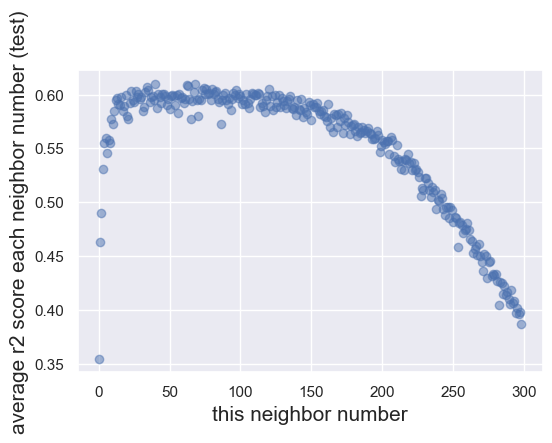

In [31]:
r_mean = pd.DataFrame(r_mean)

plt.figure(dpi=100)
plt.scatter(r_mean.index, r_mean.values, alpha=0.5)
plt.xlabel('this neighbor number', fontsize=15)
plt.ylabel('average r2 score each neighbor number (test)', fontsize=15)

lets zoom in on the first 150 neighbor choices

Text(0, 0.5, 'average r2 score each neighbor number (test)')

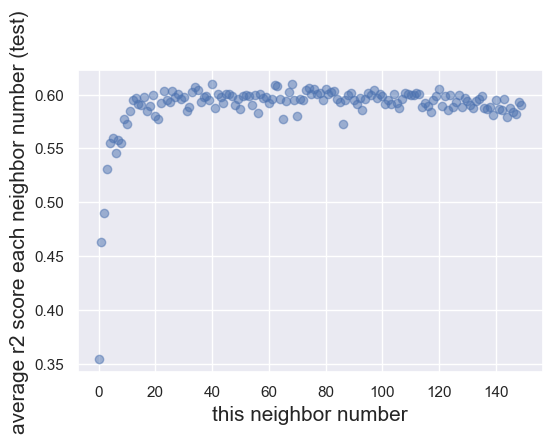

In [32]:
plt.figure(dpi=100)
plt.scatter(r_mean[:150].index, r_mean[:150].values, alpha=0.5)
plt.xlabel('this neighbor number', fontsize=15)
plt.ylabel('average r2 score each neighbor number (test)', fontsize=15)

lets zoonm on the first 60 - 120 neighbor choices

Text(0, 0.5, 'average r2 score each neighbor number (test)')

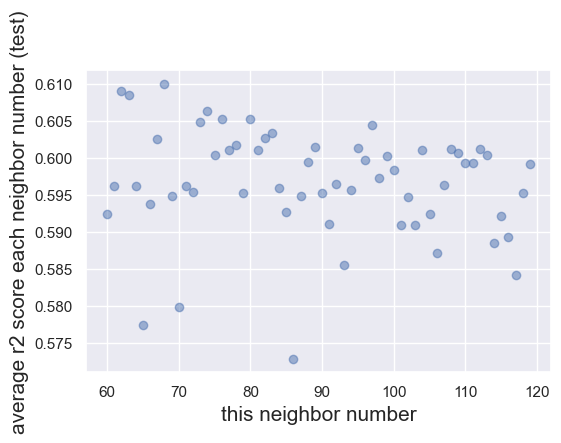

In [33]:
plt.figure(dpi=100)
plt.scatter(r_mean[60:120].index, r_mean[60:120].values, alpha=0.5)
plt.xlabel('this neighbor number', fontsize=15)
plt.ylabel('average r2 score each neighbor number (test)', fontsize=15)

lets take look at this neighbor number's corresponding figures

In [34]:
from sklearn import neighbors

X = body_dimensions[features]
y = body_dimensions['wri_di']
scaler = preprocessing.StandardScaler()                #standardize the input x
X = scaler.fit_transform(X)

xval = model_selection.KFold(5, shuffle=True)
model3 = neighbors.KNeighborsRegressor(neighbor)

result = model_selection.cross_validate(model3, X, y, cv=xval, scoring='r2', return_train_score=True)

print('R2 mean:', result['test_score'].mean())
print('R2 STD:', result['test_score'].std())
print('Kappa Mean (train):', result['train_score'].mean())

R2 mean: 0.6092499465199007
R2 STD: 0.04165759365010454
Kappa Mean (train): 0.6200978343103193


______
<br/><br/>

## 3. Logistic Regression Research Question Set

### Is there a relationship between Gender and Wrist Diameter, Age, Thigh Girth, and Chest Diameter in the sample? Can we predict Gender well with our model?

###  1. Logistic Regression

Cohen Kappa basically tells you how much better your classifier is performing over the performance of a classifier that simply guesses at random according to the frequency of each class. Cohen's kappa is always less than or equal to 1. Its value of 0 or less indicates that the classifier is useless.

In [35]:
features = ['wri_di', 'age', 'thi_gi', 'che_di']            #change our x and y variables
X = body_dimensions[features]
y = body_dimensions['sex']

scaler = preprocessing.StandardScaler()                      #standardize the input x, logistic model is sensitive to ourliers (extreme)!
X = scaler.fit_transform(X)

xval = model_selection.KFold(20, shuffle=True)
model1 = linear_model.LogisticRegression('l1', solver='liblinear')   #l1 - feature selection
                                                                     #‘liblinear’ is a good choice fpr small dataset
scorer = metrics.make_scorer(metrics.cohen_kappa_score)              #cohen kappa for classification, R^2 for regression

results = model_selection.cross_validate(model1, X, y, cv=xval,
                                         return_train_score=True, scoring=scorer)
                                         
print('Mean R2:', results['test_score'].mean())
print('R2 SD:', results['test_score'].std())
print('R2 Mean (train):', results['train_score'].mean())    #quite a okay figure, not overfitted

Mean R2: 0.846846289649552
R2 SD: 0.1264926279491883
R2 Mean (train): 0.8582434787336224


In [36]:
from sklearn import pipeline

features = ['wri_di', 'age', 'thi_gi', 'che_di']
X = body_dimensions[features]
y = body_dimensions['sex']

pipe = pipeline.Pipeline([
    ('scaling', preprocessing.StandardScaler()),
    ('model', linear_model.LogisticRegression('l1', solver='liblinear')),
])
pipe.fit(X, y)

xval = model_selection.KFold(20, shuffle=True)

scorer = metrics.make_scorer(metrics.cohen_kappa_score)
result = model_selection.cross_validate(pipe, X, y, return_train_score=True, cv=xval, scoring=scorer)

print('Kappa mean for Test:', result['test_score'].mean())
print('Kappa std for Test:', result['test_score'].std())
print('Kappa mean for Train:', result['train_score'].mean())
print('Kappa std for Train:', result['train_score'].mean())

Kappa mean for Test: 0.8307418558709234
Kappa std for Test: 0.10830689135462016
Kappa mean for Train: 0.8586335428683775
Kappa std for Train: 0.8586335428683775


In [37]:
reg = model1.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[[ 2.30297972 -0.02986537 -0.45593706  0.83431482]]
[-20.84336823]


### Logistic Regression Equation:

log($\hat{p}$/1-$\hat{p}$) = -20.84364548 + 2.30299898 * wri_di - 0.02986485 * Age -0.45594093 * thi_gi + 0.83432535 * che_di

###  2. Random Forest and Ensemble Forest

In [38]:
# 1. Random Forest
features = ['wri_di', 'age', 'thi_gi', 'che_di']
X = body_dimensions[features]
y = body_dimensions['sex']

kappa_mean = []
kappa_std = []

for min_leaf in range(1, 500):
    xval = model_selection.KFold(10, shuffle=True)
    model2 = tree.DecisionTreeClassifier(min_samples_leaf=min_leaf)

    scorer = metrics.make_scorer(metrics.cohen_kappa_score)
    result = model_selection.cross_validate(model2, X, y, cv=xval, scoring=scorer, return_train_score=True)

    kappa_mean.append(result['test_score'].mean())
    kappa_std.append(result['test_score'].std())

In [39]:
print('max kappa with a certain sample number:', max(kappa_mean))
print('this min sample number:', kappa_mean.index(max(kappa_mean)) - 1)

sample = kappa_mean.index(max(r_mean)) - 1

max kappa with a certain sample number: 0.830744786493189
this min sample number: 6


In [40]:
print("this number's test kappa std:", kappa_std[kappa_mean.index(max(kappa_mean))])

this number's test kappa std: 0.05678357225154681


but, does this actually make sense?

Text(0, 0.5, 'average Kappa score each leaf (test)')

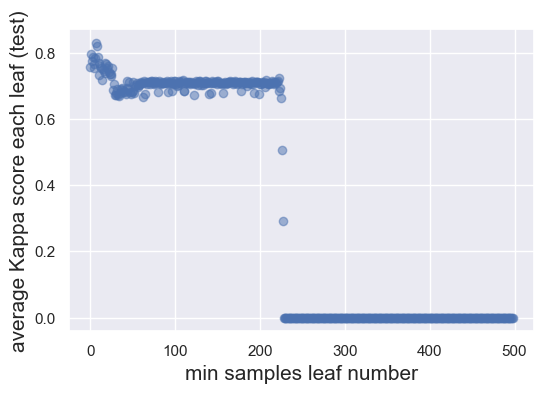

In [41]:
kappa_mean = pd.DataFrame(kappa_mean)

plt.figure(dpi=100)
plt.scatter(kappa_mean.index, kappa_mean.values, alpha=0.5)
plt.xlabel('min samples leaf number', fontsize=15)
plt.ylabel('average Kappa score each leaf (test)', fontsize=15)

lets zoom in on the first 100

Text(0, 0.5, 'average Kappa score each leaf (test)')

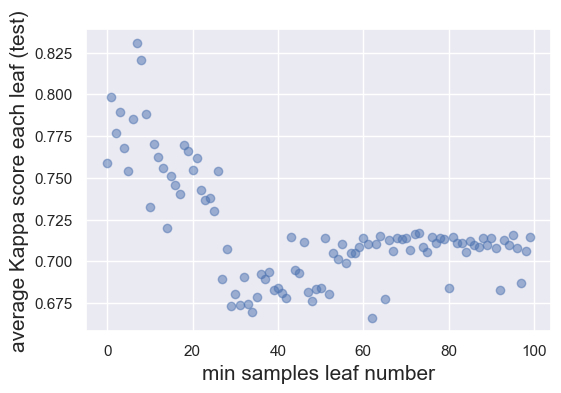

In [42]:
plt.figure(dpi=100)
plt.scatter(kappa_mean[:100].index, kappa_mean[:100].values, alpha=0.5)
plt.xlabel('min samples leaf number', fontsize=15)
plt.ylabel('average Kappa score each leaf (test)', fontsize=15)

Kappa measures the agreement between two raters (judges) who each classify items into mutually exclusive categories. Cohen's kappa can always be increased and decreased by combining categories.

for a more stable kappa score, lets look at the first 40 - 100

Text(0, 0.5, 'average Kappa score each leaf (test)')

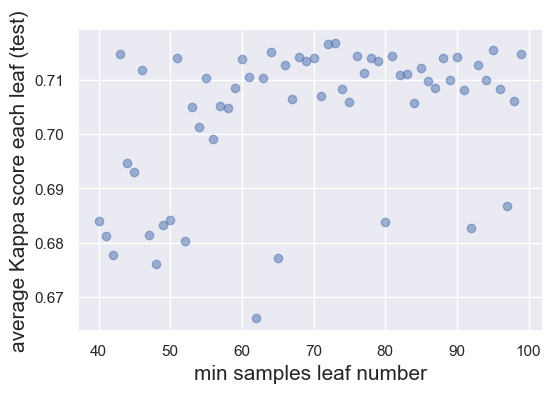

In [43]:
plt.figure(dpi=100)
plt.scatter(kappa_mean[40:100].index, kappa_mean[40:100].values, alpha=0.5)
plt.xlabel('min samples leaf number', fontsize=15)
plt.ylabel('average Kappa score each leaf (test)', fontsize=15)

lets try 70 for a more stable kappa

In [44]:
features = ['wri_di', 'age', 'thi_gi', 'che_di']
X = body_dimensions[features]
y = body_dimensions['sex']

model2 = tree.DecisionTreeClassifier(min_samples_leaf=70)

xval = model_selection.KFold(10, shuffle=True)

scorer = metrics.make_scorer(metrics.cohen_kappa_score)
result = model_selection.cross_validate(model2, X, y, cv=xval, scoring=scorer, return_train_score=True)

print('Kappa Mean:', result['test_score'].mean())
print('Kappa STD:', result['test_score'].std())
print('Kappa Mean (train):', result['train_score'].mean())    #quite a okay figure, not overfitted

Kappa Mean: 0.7098465979075544
Kappa STD: 0.07544507785536102
Kappa Mean (train): 0.7278376443742025


plot this tree

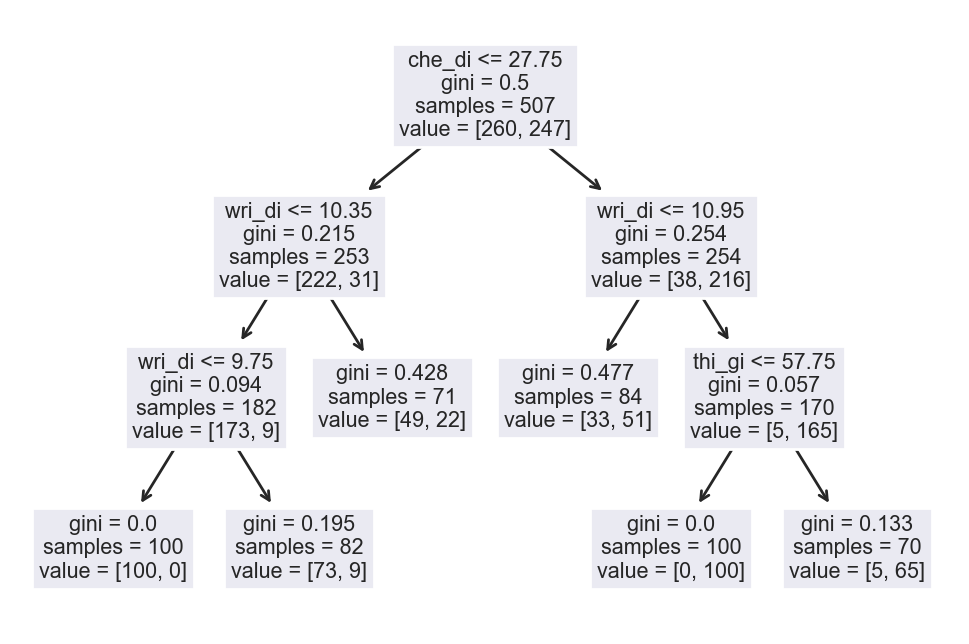

In [45]:
model2.fit(X,y)

plt.figure(dpi=200)
_ = tree.plot_tree(model2, feature_names=features)

pretty good Gini Impurity figure!

More precisely, the Gini Impurity of a dataset is a number between 0-0.5, which indicates the likelihood of new, random data being misclassified if it were given a random class label according to its original class distribution in the dataset. Lower the gini is, better our labeling does.

In [46]:
# 2. ensembled random forest
features = ['wri_di', 'age', 'thi_gi', 'che_di']
X = body_dimensions[features]
y = body_dimensions['sex']

kappa_mean = []
kappa_std = []

for n in range(1, 200):
    xval = model_selection.KFold(10, shuffle=True)
    model2 = ensemble.RandomForestClassifier(n,                          #n decisoin trees to cancel each other out, 
                                             min_samples_leaf=70,        #also control each individual tree to not ovefit with our chosen 70
                                             max_samples=0.5)            #control each tree's sampling portion of the train data

    scorer = metrics.make_scorer(metrics.cohen_kappa_score)
    result = model_selection.cross_validate(model2, X, y, cv=xval, scoring=scorer, return_train_score=True)

    kappa_mean.append(result['test_score'].mean())
    kappa_std.append(result['test_score'].std())

In [47]:
print('max kappa with a certain tree count number:', max(r2_mean))
print('this number:', r2_mean.index(max(r2_mean))-1)

sample = kappa_mean.index(max(kappa_mean)) - 1

max kappa with a certain tree count number: 0.6084444270267453
this number: 37


In [48]:
print("this number's test kappa std:", kappa_std[kappa_mean.index(max(kappa_mean))])

this number's test kappa std: 0.09504048403134223


Text(0, 0.5, 'average kappa score each n (test)')

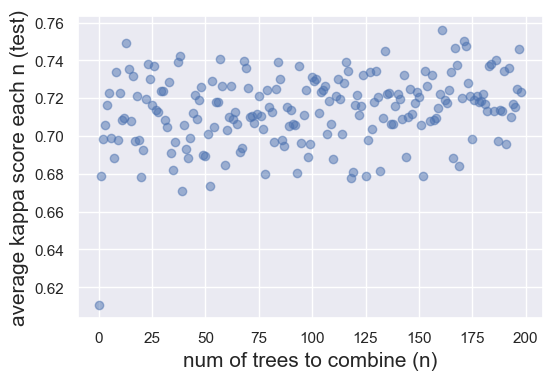

In [49]:
kappa_mean = pd.DataFrame(kappa_mean)

plt.figure(dpi=100)
plt.scatter(kappa_mean.index, kappa_mean.values, alpha=0.5)
plt.xlabel('num of trees to combine (n)', fontsize=15)
plt.ylabel('average kappa score each n (test)', fontsize=15)

take a look into this sample number

In [50]:
features = ['wri_di', 'age', 'thi_gi', 'che_di']
X = body_dimensions[features]
y = body_dimensions['sex']

xval = model_selection.KFold(10, shuffle=True)

model2_ = ensemble.RandomForestClassifier(n,                     #25 decisoin trees to cancel each other out, 
                                          min_samples_leaf=70,    #also control each individual tree to not ovefit
                                          max_samples=0.5)        #control each tree's sampling portion of the train data

scorer = metrics.make_scorer(metrics.cohen_kappa_score)
result = model_selection.cross_validate(model2, X, y, cv=xval, scoring=scorer, return_train_score=True)

print('Kappa Mean:', result['test_score'].mean())
print('Kappa STD:', result['test_score'].std())
print('Kappa Mean (train):', result['train_score'].mean())        #kinda overfitted to the train dataset

Kappa Mean: 0.7007426986644039
Kappa STD: 0.09950199295555838
Kappa Mean (train): 0.7462500752920012


still, almost the same with Random Forest :(  (0.706 vs 0.7115)

### 3. KNN

In [51]:
X = body_dimensions[features]
y = body_dimensions['sex']

scaler = preprocessing.StandardScaler()                #standardize the input x
X = scaler.fit_transform(X)

kappa_mean = []
kappa_std = []

for neighbor in range(1, 300):
    xval = model_selection.KFold(10, shuffle=True)
    model3 = neighbors.KNeighborsClassifier(neighbor)

    scorer = metrics.make_scorer(metrics.cohen_kappa_score)
    result = model_selection.cross_validate(model3, X, y, cv=xval, scoring=scorer, return_train_score=True)

    kappa_mean.append(result['test_score'].mean())
    kappa_std.append(result['test_score'].std())

In [52]:
print('max Kappa with a certain neighbor number:', max(kappa_mean))
print('this neighbor number:', kappa_mean.index(max(kappa_mean))-1)

neighbor = kappa_mean.index(max(kappa_mean))-1

max Kappa with a certain neighbor number: 0.8455875893857954
this neighbor number: 9


In [53]:
print("this number's test kappa std:", kappa_std[kappa_mean.index(max(kappa_mean))])

this number's test kappa std: 0.07701765751323827


Text(0, 0.5, 'average kappa score each neighbor number (test)')

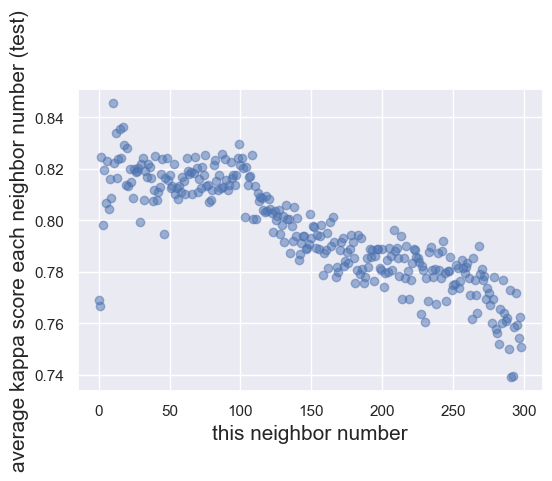

In [54]:
kappa_mean = pd.DataFrame(kappa_mean)

plt.figure(dpi=100)
plt.scatter(kappa_mean.index, kappa_mean.values, alpha=0.5)
plt.xlabel('this neighbor number', fontsize=15)
plt.ylabel('average kappa score each neighbor number (test)', fontsize=15)

first 120

Text(0, 0.5, 'average kappa score each neighbor number (test)')

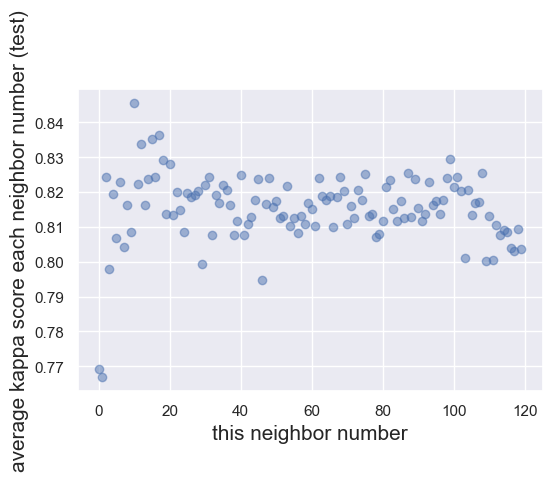

In [55]:
plt.figure(dpi=100)
plt.scatter(kappa_mean[:120].index, kappa_mean[:120].values, alpha=0.5)
plt.xlabel('this neighbor number', fontsize=15)
plt.ylabel('average kappa score each neighbor number (test)', fontsize=15)

first 40

Text(0, 0.5, 'average kappa score each neighbor number (test)')

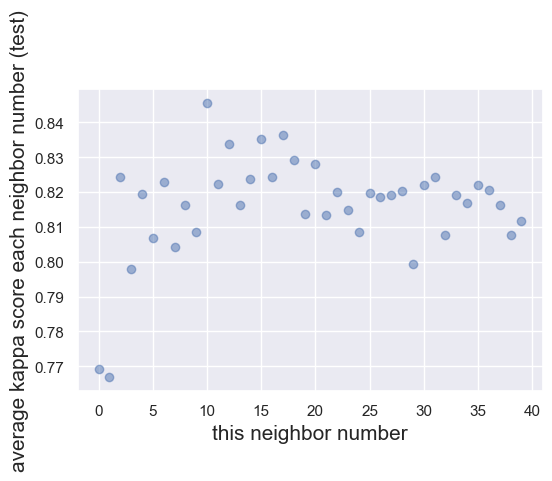

In [56]:
plt.figure(dpi=100)
plt.scatter(kappa_mean[:40].index, kappa_mean[:40].values, alpha=0.5)
plt.xlabel('this neighbor number', fontsize=15)
plt.ylabel('average kappa score each neighbor number (test)', fontsize=15)

In [57]:
X = body_dimensions[features]
y = body_dimensions['sex']
scaler = preprocessing.StandardScaler()                #standardize the input x
X = scaler.fit_transform(X)

xval = model_selection.KFold(5, shuffle=True)
model3 = neighbors.KNeighborsClassifier(neighbor)

scorer = metrics.make_scorer(metrics.cohen_kappa_score)
result = model_selection.cross_validate(model3, X, y, cv=xval, scoring=scorer, return_train_score=True)

print('Kappa mean:', result['test_score'].mean())
print('Kappa STD:', result['test_score'].std())
print('Kappa Mean (train):', result['train_score'].mean())

Kappa mean: 0.8401814796922935
Kappa STD: 0.05374866797872185
Kappa Mean (train): 0.8536435130934461


______
<br/><br/>

## 4. Conclusion


#### **Linear Regression Research Question** - Is there a relationship between Wrist Diameter and Gender, Age, Thigh Girth, and Chest Diameter in the sample? Can we predict Wrist Diameter well with our model?

Since our Significance of Regression F test p value (6.49e-110) < alpha value (0.05), we reject the null hypothesis and conclude that none of the slope is zero in the mdoel. 

Therefore, we believe there is a linear relationship between Wrist Diameter and Gender, Age, Thigh Girth, and Chest Diameter both in the sample and the population.

Our Lieanr Model seems to be the one with the highest R2.
<br/><br/> 

#### **Logistic Regression Research Questionn** - Is there a relationship between Gender and Wrist Diameter, Age, Thigh Girth, and Chest Diameter in the sample? Can we predict Gender well with our model?

According to the summary table in Logistic Model, we can see that the p values for Wrist Diameter, Thigh Girth, and Chest Diameter are all 0, << any Significance Level. Such conclusion could be applied to the population - physically active people in California.

Here, Logistic and KNN seems to be our best model with a highest Cohen Kappa Score.
<br/><br/>